# $\frac{a}{b+c}+\frac{b}{c+a}+\frac{c}{a+b}=4$

# Deutsche Version
Die Lösung soll in natürlichen Zahlen bestehen, also $a,b,c \in \mathbb{N}$.  
Bevor Sie versuchen, die Lösung durch Probieren zu bekommen, die Lösung ist:   
a = 154476802108746166441951315019919837485664325669565431700026634898253202035277999  
b = 36875131794129999827197811565225474825492979968971970996283137471637224634055579  
c = 4373612677928697257861252602371390152816537558161613618621437993378423467772036

Wir verwenden Python, Jupyter Notebooks und das Python-Modul Sympy. Es gibt eine englische und eine deutsche Version des Jupyter Notebooks. 

Wir empfehlen, Python und Jupyter über [Anaconda](https://www.anaconda.com/products/distribution) zu installieren, das auch eine freie Distribution liefert. Sympy kann über `pip install sympy` installiert werden. 

Die Lösung folgt einem Artikel, der in [Spektrum der Wissenschaft](www.spektrum.de) 11.2022 Seite 73 veröffentlicht wurde. 

Sie verwendet eine elliptische Kurve und die Konstruktion zusätzlicher rationaler Punkte durch Tangenten an oder Linien durch rationale Punkte und deren Schnittpunkt mit der elliptischen Kurve. 

### Methode: 
- Multipliziere die Gleichung mit (a+b)(b+c)(c+a), um eine homogene Gleichung dritter Ordnung in a,b,c zu erhalten. 
- Dividiere diese Gleichung durch $c^3$, um eine Gleichung in $x=a/c$ und $y=b/c$ dritter Ordnung in x und y zu erhalten. 
- Benutze 2 bekannte Lösungen x,y = (-4,-11) und x,y = (-11,-4), um weitere rationale Punkte auf der Kurve zu finden.
- Benutze diese zusätzlichen Punkte mit Tangenten und Geraden durch diese Punkte, um weitere rationale Punkte auf der Kurve zu finden, bis es einen Punkt (x,y) gibt, bei dem x und y beide größer als 0 sind.
- Berechnen Sie a,b,c aus diesem x und y. 
    

# Das Problem
folgend Spektrum der Wissenschaft 11.22 page 73.   
Wir nutzen Python und das Modul Sympy zur symbolischen Berechnung. 

Wir wollen die Gleichung $$\frac{a}{b+c}+\frac{b}{c+a}+\frac{c}{a+b}=4$$ lösen.  

Erweitere mit $(a+b)(b+c)(a+c)$ was Folgendes ergibt:

In [1]:
from sympy import *
init_printing()
a,b,c,x,y = symbols('a b c x y')

In [2]:
eq = a/(b+c)+b/(c+a)+c/(a+b)-4
eq2 = simplify(eq*(a+b)*(b+c)*(c+a))
eq2

Also haben wir: $$a^3+b^3+c^3-3(a^2b+a^2c+ab^2+ac^2+b^2c+bc^2)-5abc=0$$
Dividiere durch $c^3$ und setze $x=\frac{a}{c}$ und $y=\frac{b}{c}$ und wir erhalten folgende Gleichung, die  0 ergeben soll:

In [3]:
x,y,dx,dy = symbols('x y dx dy')
eq = x**3+y**3+1-3*(x**2*y+x**2+x*y**2+y**2+x+y)-5*x*y
eq

In [4]:
# Wir kennen eine Lösung (-11,-4) und auch die spiegelbildliche Lösung (-4,-11)
x1 = -11
y1 = -4
# Einsetzen der Werte in Sympy via .subs()
eq.subs(x,x1).subs(y,y1)

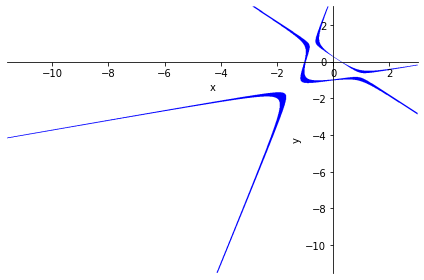

In [5]:
# Plot in Sympy
plt = plot_implicit(eq,('x', -11.6, 3), ('y', -11.5, 3))

### Nun eine Tangente an (x1,x1). 
Dazu differenzieren wir die Gleichung und bilden $d(eq)=\frac{\partial (eq)}{\partial x}dx + \frac{\partial (eq)}{\partial y}dy$:

In [6]:
deq_dx = diff(eq,x)
deq_dy = diff(eq,y)
deq = deq_dx*dx+deq_dy*dy
deq

Das sollte 0 ergeben, also gilt für dy/dx: 

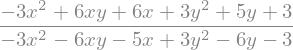

In [7]:
dy_dx = -deq_dx/deq_dy
dy_dx

Für eine Tangente $y=mx+b$ kennen wir die Steigung m an diesem Punkt, indem wir x1 und y1 für x und y einsetzent.    
Für b wissen wir dass gilt: $b=y1-m*x1$

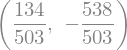

In [8]:
m = dy_dx.subs(x,x1).subs(y,y1)
b = y1-m*x1
m,b

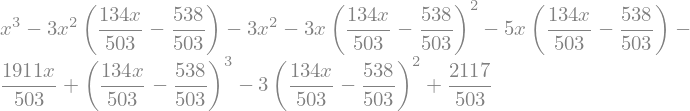

In [9]:
# Finde einen anderen Punkt auf der Kurve: 
# eq2 ist die Tangentengleichung
eq2 = m*x+b
# Der y Wert von eq muss auf der Tangente liegen, 
# also können wir y in eq durch die Tangententleichung ersetzen:
eq3 = eq.subs(y,eq2)
eq3

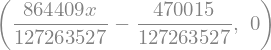

In [10]:
# Wir wissen, dass x=x1 eq erfüllt 
# genau 2 Mal, da es eine Tangente ist), also können wir eq3 durch (x-x1)^2 dividieren)
q1,r1 = div(eq3,(x-x1)**2)
q1,r1

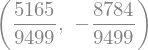

In [11]:
# Und das lösen wir, um den dritten Schnittpunkt zu bekommen
x2=solve(q1,x)[0]
y2 = eq2.subs(x,x2)
x2,y2

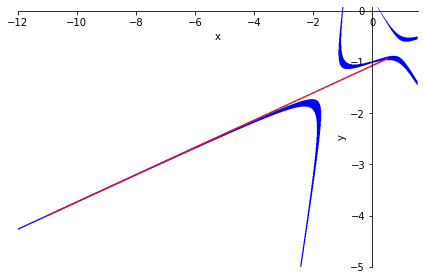

In [12]:
p1 = plot_implicit(eq,x_var=('x', x1-1, x2+1), y_var=('y', y1-1,y2+1),show=False)
p2 = plot(eq2, ('x', x1, x2),line_color='crimson',show=False)
p1.append(p2[0])
p1.show()

### Anmerkung
Die Gleichung ist dritter Ordnung.   
Mit einer Tangente oder einer Sekante bekommen wir 2 Schnittpunkte gegeben.   
Deshalb können wir zweimal durch $(x-x_i)$ dividieren und erhalten eine Gleichung 1. Grades mit rationalen Koeffizienten.   
Diese können wir lösen und erhalten wieder einen Punkt x mit rationalem x, und da y auf der Gerade liegt, auch ein rationales y.   
Das ist der Grund für diese Konstruktion mit Tangenten oder Sekanten.


### Nächster Schritt

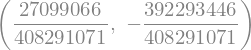

In [13]:
# Nun die Tangente an x2,y2
m = dy_dx.subs(x,x2).subs(y,y2)
b = y2-m*x2
m,b

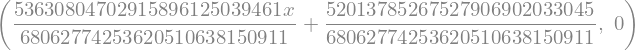

In [14]:
# Finde den nächsten Schnittpunkt: 
eq2 = m*x+b
eq3 = eq.subs(y,eq2)
q1,r1 = div(eq3,(x-x2)**2)
q1,r1

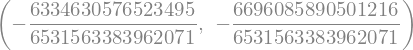

In [15]:
[x3]=solve(q1,x)
y3 = eq2.subs(x,x3)
x3,y3

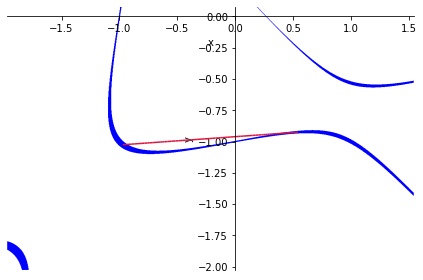

In [16]:
p1 = plot_implicit(eq,x_var=('x', x3-1, x2+1), y_var=('y', y3-1,y2+1),show=False)
p2 = plot(eq2, ('x', x3, x2), line_color='crimson',show=False)
p1.append(p2[0])
p1.show()

### Nächster Schritt

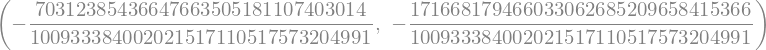

In [17]:
# Tangente an (x3,y3)
m = dy_dx.subs(x,x3).subs(y,y3)
b = y3-m*x3
m,b

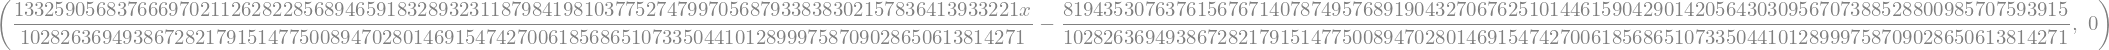

In [18]:
# Finde nächsten Schnittpunkt: 
eq2 = m*x+b
eq3 = eq.subs(y,eq2)
q1,r1 = div(eq3,(x-x3)**2)
q1,r1

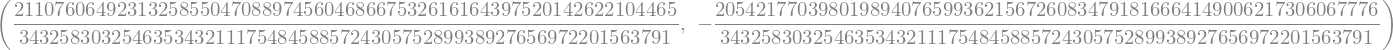

In [19]:
[x4]=solve(q1,x)
x4
y4 = eq2.subs(x,x4)
x4,y4

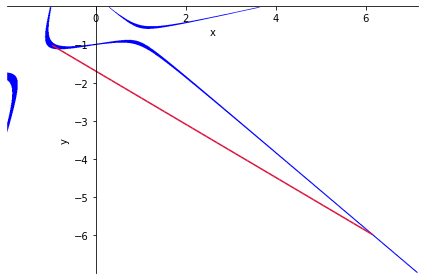

In [20]:
p1 = plot_implicit(eq,x_var=('x', x3-1, x4+1), y_var=('y', y4-1,y3+1),show=False)
p2 = plot(eq2, ('x',x3,x4), line_color='crimson',show=False)
p1.append(p2[0])
p1.show()

### Letzter Schritt
Jetzt nutzen wir keine Tangente, sonern die Linie zwischen den 2 Punkten (-4,-11) and (x4,y4). 

In [21]:
# Kontrolle, dass (-4,-11) auf der Kurve liegt
x5,y5=-4,-11
eq.subs(x,x5).subs(y,y5)

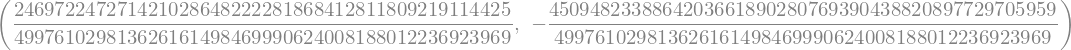

In [22]:
# Die Steigung ist nun die Differenz der y-Werte durch die Differenz der x-Werte:
m = (y4-y5)/(x4-x5)
b = y5-m*x5
m,b

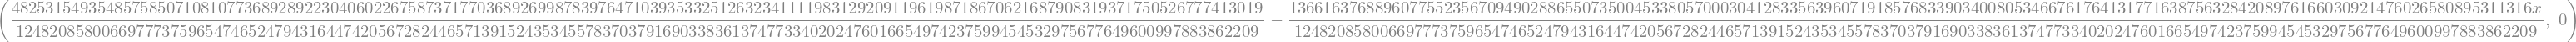

In [23]:
# Der nächste Schnittpunkt: 
eq2 = m*x+b
eq3 = eq.subs(y,eq2)
q1,r1 = div(eq3,(x-x5)*(x-x4))
q1,r1

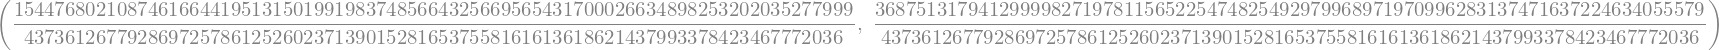

In [24]:
[x6]=solve(q1,x)
y6 = eq2.subs(x,x6)
x6,y6

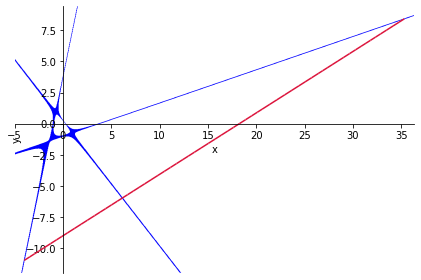

In [25]:
p1 = plot_implicit(eq,x_var=('x', x5-1, x6+1), y_var=('y', y5-1,y6+1),show=False)
p2 = plot(eq2, ('x', -4, x6), line_color='crimson',show=False)
p1.append(p2[0])
p1.show()

# Das ist die Lösung, wir brauchen a, b, c
x und y sind beide positiv

In [26]:
c = 4373612677928697257861252602371390152816537558161613618621437993378423467772036
a = x6*c
b = y6*c
a,b,c

In [27]:
# Check: 
a/(b+c)+b/(c+a)+c/(a+b)

**Bemerkung:** Beide Nenner für x und y sind gleich, so dass wir c direkt ablesen können. Wären die Nenner von $x = \frac{x_6}{c_1}$ und $y= \frac{y_6}{c_2}$ verschiden, brauchten wir das kleinste gemeinsame Vielfache der Nenner und müssten erweitern: 
Mit Euklids Algorithmus kann man den größten gemeinsamen Teiler gcd erhalten und daraus das kleinste gemeinsame Vielfache c bekommen und weiterhin nutzen: $c_1=gcd(c_1,c_2)*n_1$ und $c_2=gcd(c_1,c_2)*n_2$ um a, b und c zu bekommen:
$$\begin{align}
x &= x_5*n_2\\
y &= y_5*n_1\\
c &= gcd(c_1,c_2)*n_1*n_2
\end{align}$$

In [28]:
def euclid(a,b):
    if b>a: a,b = b,a
    while b>0:
        r = a%b
        a,b = b,r
    return a

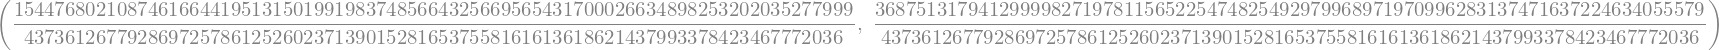

In [29]:
x6,y6

In [30]:
# Sympy extrahiert den Nenner via x.p und den Zähler via x.q
c1 = x6.q
c2 = y6.q
gcd = euclid(c1,c2)
n1 = c1//gcd
n2 = c2//gcd
a = x6.p*n2
b = y6.p*n1
c = c1*n2
print(f"a = {a}\nb = {b}\nc = {c}")

a = 154476802108746166441951315019919837485664325669565431700026634898253202035277999
b = 36875131794129999827197811565225474825492979968971970996283137471637224634055579
c = 4373612677928697257861252602371390152816537558161613618621437993378423467772036
